### L-fold Cross Validation

In [1]:
library(reshape2)
library(ggplot2)

#### Train data loading

In [2]:
train_data <- read.csv('Data//1A_train.csv')
train_data <- train_data[sample(1:nrow(train_data),nrow(train_data)),]
train.data <- data.frame(x1 = train_data[, 'x1']) # grab all records, leave out the last column
train.label <- train_data[, 'y']

#### KNN Regressor

In [3]:
# KNN function
knn <- function(train.data, train.label, test.data, K=4, distance = 'euclidean'){
    # count number of train samples
    train.len <- nrow(train.data)

    # count number of test samples
    test.len <- nrow(test.data)
    
    # calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # initialize testLabel
    testLabel <- rep(0.0, test.len)
    
    # for each test sample...
    for (i in 1:test.len){
        # ...find its K nearest neighbours from training samples...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        #... and calculate the predicted labels by averaging nearest neighbours values
        testLabel[i]<- mean(train.label[nn])
    }

    # return the class labels as output
    return (testLabel)
}

**I. L-Fold Cross Validation (CV) function for KNN regressor which takes the training data and their labels (continuous values), the number of folds, and returns errors for different folds of the training data.**

In [233]:
# Randomly shuffle the data
# train.data <- train.data[sample(nrow(train.data)),]

In [4]:
cv <- function(train.data, train.label, K, numFold){
    
    # Create numFold equally size folds
    folds <- cut(seq(1,nrow(train.data)),breaks=numFold,labels=FALSE)

    folds_error <- rep(0.0, numFold)

    # Perform L fold cross validation
    for(i in 1:numFold){
        # get test data indices
        test.indices <- which(folds==i, arr.ind=TRUE)

        # test fold data
        testData <- data.frame(x1=train.data[test.indices, ])
        testLabel <- train.label[test.indices]

        # data for training 
        trainData <- data.frame(x1=train.data[-test.indices, ])
        trainLabel <- train.label[-test.indices]
        
        # get prediction from knn regressor
        pred_knn <- knn(trainData, trainLabel, testData, K=K)

        # store sum of square error for each fold
        folds_error[i] <- sum((pred_knn - testLabel)^2)    
    }
    
    return (folds_error)
}

**Plot the average error numbers versus 1/K for K=1,..,15 in KNN regressor.**

In [5]:
# calculate the train and test missclassification rates for K in 1:15
sq_error <- data.frame('K'=1:15, 'Average_error'=rep(0,15))
for (k in 1:15){
    # store average of squared error for each fold
    sq_error[k,'Average_error'] <- mean(cv(train.data, train.label, k, 10))
}

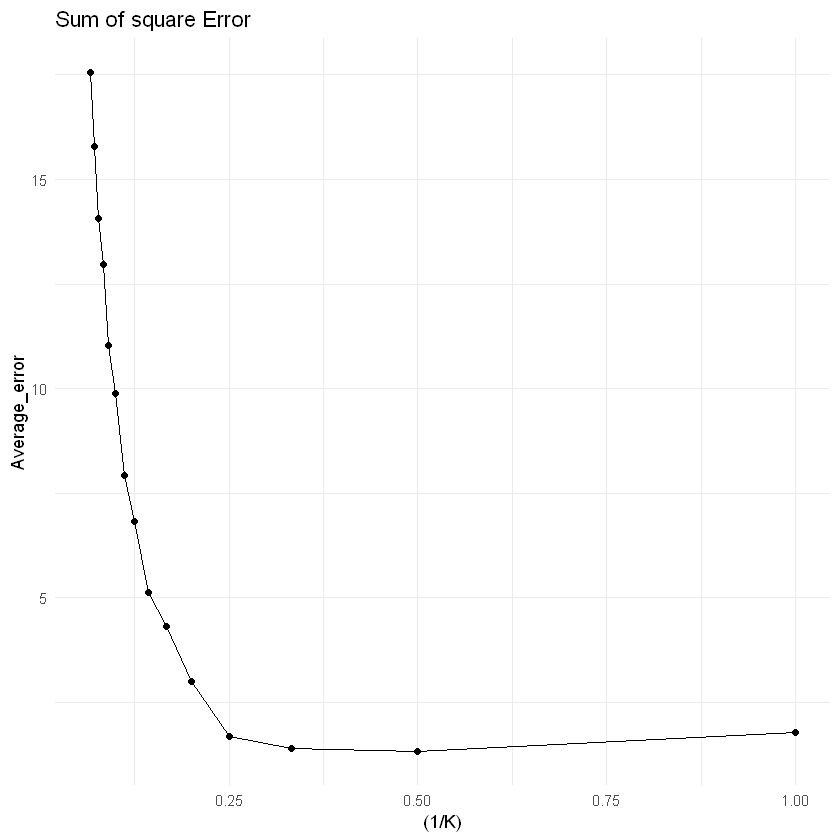

In [7]:
# plot squared error for train and test data sets
ggplot(data=sq_error, aes(x=(1/K), y=Average_error)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
        geom_point()+
       ggtitle("Sum of square Error")

From the above plot, we see that with the increase in value of `1/k`, training error on 10-fold cross validation decreases till 1/k = 0.5, which implies **k=2**, then this value increases. Hence, the optimal value of k is 2. 